<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/Adult_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('fivethirtyeight')
%matplotlib inline

In [10]:
adult_census = pd.read_csv('./adult.csv')
adult_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
adult_census.shape

(48842, 15)

In [12]:
adult_census.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 30.2 MB


In [13]:
adult_census.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [14]:
def clean(df):
  df.columns = [x.replace('-', '_') for x in df.columns]
  return df

adult_census = adult_census.pipe(clean)

In [15]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [16]:
adult_census.select_dtypes(include='object').describe().T

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital_status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
sex,48842,2,Male,32650
native_country,48842,42,United-States,43832
class,48842,2,<=50K,37155


In [17]:
adult_census.select_dtypes(include='object').astype('category').info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   workclass       48842 non-null  category
 1   education       48842 non-null  category
 2   marital_status  48842 non-null  category
 3   occupation      48842 non-null  category
 4   relationship    48842 non-null  category
 5   race            48842 non-null  category
 6   sex             48842 non-null  category
 7   native_country  48842 non-null  category
 8   class           48842 non-null  category
dtypes: category(9)
memory usage: 439.5 KB


In [18]:
adult_census.rename(columns={'class': 'Class'}, inplace=True)
df = (
    adult_census.assign(
        age = adult_census.age.astype(np.int8),
        education_num = adult_census.education_num.astype(np.int8),
        capital_loss = adult_census.capital_loss.astype(np.int16),
        hours_per_week = adult_census.hours_per_week.astype(np.int8),
        workclass = adult_census.workclass.astype('category'),
        education = adult_census.education.astype('category'),
        marital_status = adult_census.marital_status.astype('category'),
        occupation = adult_census.occupation.astype('category'),
        relationship = adult_census.relationship.astype('category'),
        race = adult_census.race.astype('category'),
        sex = adult_census.sex.astype('category'),
        native_country = adult_census.native_country.astype('category'),
        Class = adult_census.Class.astype('category'),

    )
)

In [19]:
adult_census = df.copy()
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int8    
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education_num   48842 non-null  int8    
 5   marital_status  48842 non-null  category
 6   occupation      48842 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital_gain    48842 non-null  int64   
 11  capital_loss    48842 non-null  int16   
 12  hours_per_week  48842 non-null  int8    
 13  native_country  48842 non-null  category
 14  Class           48842 non-null  category
dtypes: category(9), int16(1), int64(2), int8(3)
memory usage: 1.4 MB


In [20]:
adult_census.Class.value_counts(normalize=True) * 100

 <=50K    76.071823
 >50K     23.928177
Name: Class, dtype: float64

Imbalanced dataset

In [21]:
target_column = 'Class'

In [22]:
numerical_columns = (
    adult_census.select_dtypes(include='number').columns.tolist()
)
numerical_columns

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [23]:
categorical_columns = (
    adult_census.select_dtypes(include='category').columns[:-1].tolist()
)
categorical_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [24]:
adult_census.shape

(48842, 15)

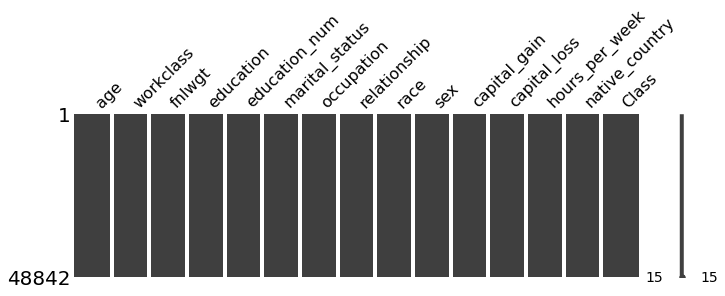

In [25]:
msno.matrix(adult_census, figsize=(10, 3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5459562610>,
      dtype=object)

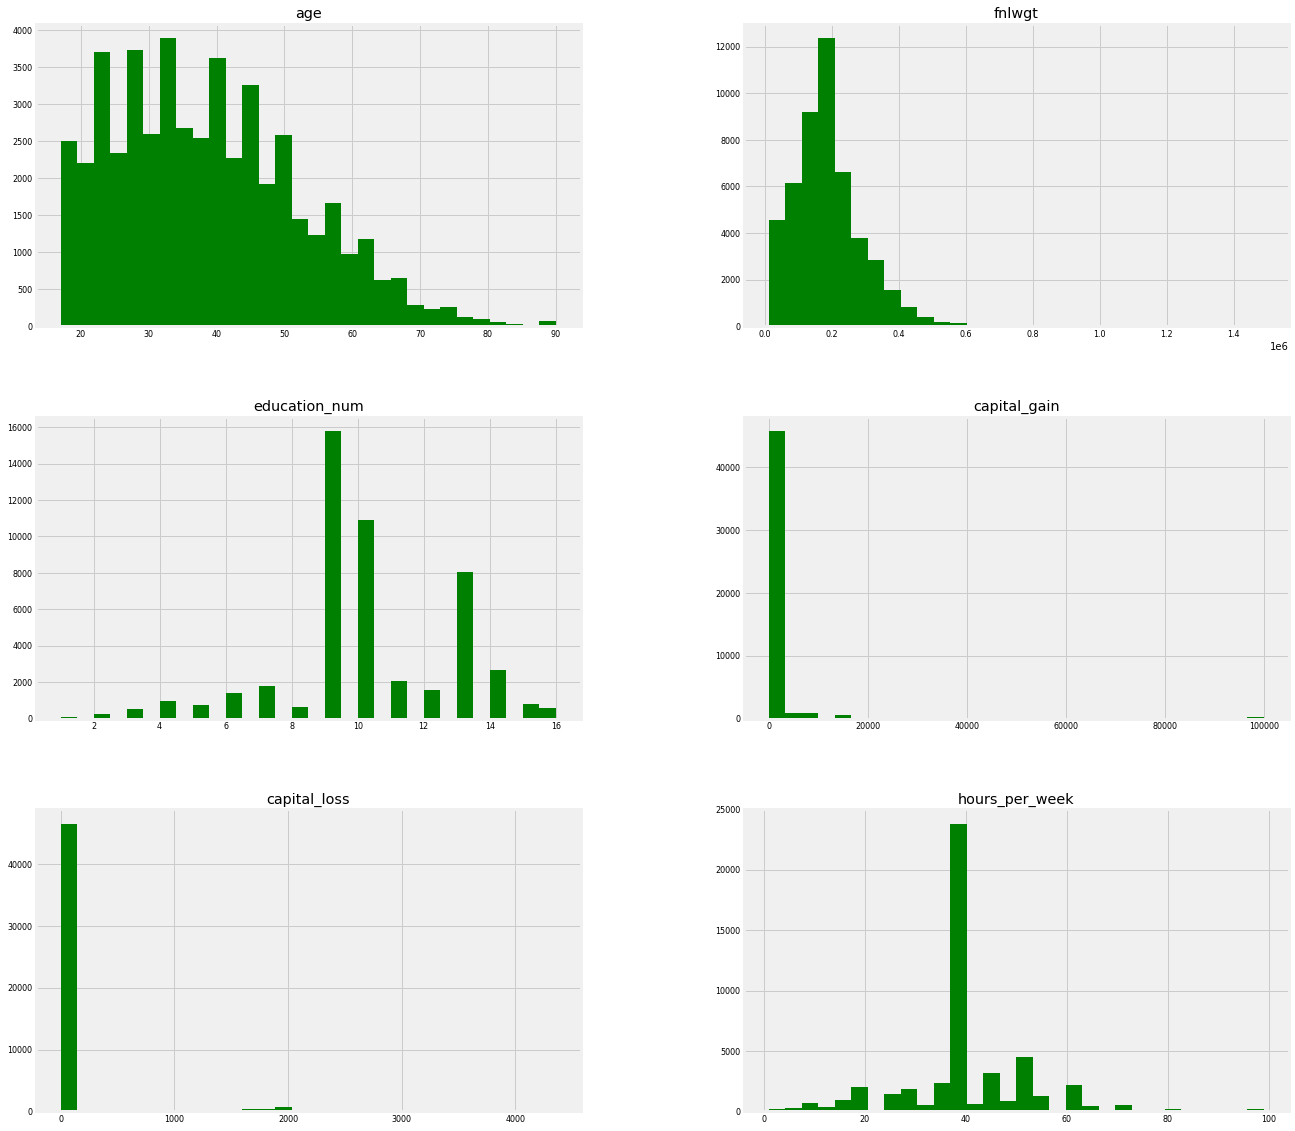

In [26]:
(
    adult_census[numerical_columns].
    hist(figsize=(20, 20), 
         color = 'g', 
         bins=30, 
         xlabelsize=8, 
         ylabelsize=8
         )
)

In [27]:
adult_census.sex.value_counts(normalize=True) * 100

 Male      66.848204
 Female    33.151796
Name: sex, dtype: float64

In [28]:
adult_census.education.value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

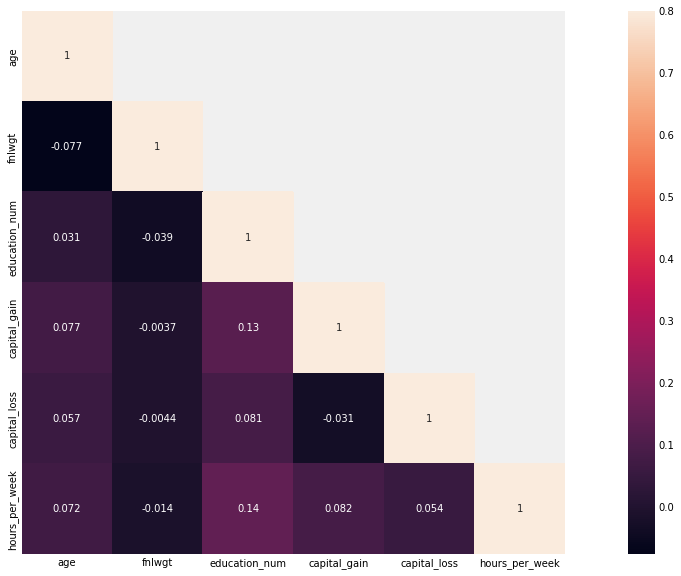

In [33]:
corr_mat = adult_census[numerical_columns].corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_mat, mask=mask,vmax=.8, square=True,annot=True)

relationship between education and education-num

In [29]:
pd.crosstab(index=adult_census.education, columns=adult_census.education_num)

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


This shows that education and education-num give you the same information. For example, education-num=2 is equivalent to education='1st-4th'. In practice that means we can remove education-num without losing information. Note that having redundant (or highly correlated) columns can be a problem for machine learning algorithms.

Another way to inspect the data is to do a pairplot and show how each variable differs according to our target, i.e. class. Plots along the diagonal show the distribution of individual variables for each class. The plots on the off-diagonal can reveal interesting interactions between variables.

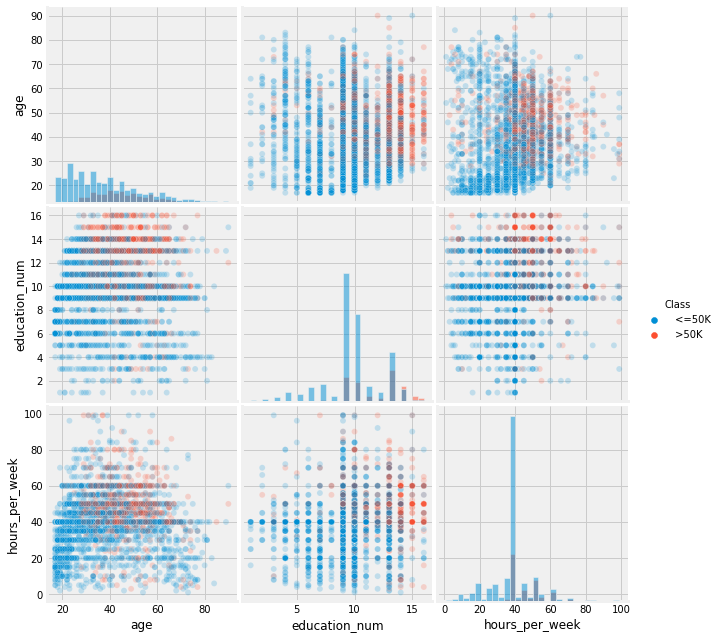

In [30]:
# We will plot a subset of the data to keep the plot readable and make the
# plotting faster
n_samples_to_plot = 5000
columns = ['age', 'education_num', 'hours_per_week']
sns.pairplot(data=adult_census[:n_samples_to_plot], vars=columns,
                 hue=target_column, plot_kws={'alpha': 0.2},
                 height=3, diag_kind='hist', diag_kws={'bins': 30})

Creating decision rules by hand
By looking at the previous plots, we could create some hand-written rules that predicts whether someone has a high- or low-income. For instance, we could focus on the combination of the hours-per-week and age features.

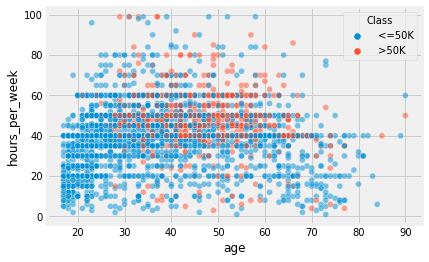

In [31]:
sns.scatterplot(
    x="age", y="hours_per_week", 
    data=adult_census[:n_samples_to_plot],
    hue="Class", alpha=0.5,
)

The data points (circles) show the distribution of hours-per-week and age in the dataset. Blue points mean low-income and orange points mean high-income. This part of the plot is the same as the bottom-left plot in the pairplot above.

In this plot, we can try to find regions that mainly contains a single class such that we can easily decide what class one should predict. We could come up with hand-written rules as shown in this plot:



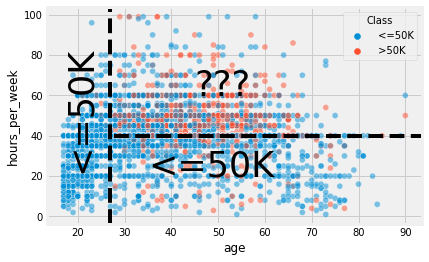

In [32]:
ax = sns.scatterplot(
    x="age", y="hours_per_week", data=adult_census[:n_samples_to_plot],
    hue="Class", alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

-  In the region age < 27 (left region) the prediction is low-income. Indeed, there are many blue points and we cannot see any orange points.
-  In the region age > 27 AND hours-per-week < 40 (bottom-right region), the prediction is low-income. Indeed, there are many blue points and only a few orange points.
-  In the region age > 27 AND hours-per-week > 40 (top-right region), we see a mix of blue points and orange points. It seems complicated to chose which class we should predict in this region.


It is interesting to note that some machine learning models will work similarly to what we did: they are known as decision tree models. The two thresholds that we chose (27 years and 40 hours) are somewhat arbitrary, i.e. we chose them by only looking at the pairplot. In contrast, a decision tree will chose the "best" splits based on data without human intervention or inspection. Decision trees will be covered in more details in a future module.

Note that machine learning is really interesting when creating rules by hand is not straightforward, for example because we are in high dimension (many features) or because there are no simple and obvious rules that separate the two classes as in the top-right region of the previous plot.

To sum up, the important thing to remember is that in a machine-learning setting, a model automatically creates the "rules" from the data in order to make predictions on new unseen data.

In this notebook we have:

-  loaded the data from a CSV file using pandas;
-  looked at the different kind of variables to differentiate between categorical and numerical variables;
-  inspected the data with pandas and seaborn. Data inspection can allow you to decide whether using machine learning is appropriate for your data and to highlight potential peculiarities in your data.


Ideas which will be discussed more in details later:

-  if your target variable is imbalanced (e.g., you have more samples from one target category than another), you may need special techniques for training and evaluating your machine learning model;
-  having redundant (or highly correlated) columns can be a problem for some machine learning algorithms;
-  contrary to decision tree, linear models can only capture linear interaction, so be aware of non-linear relationships in your data.

## First model with scikit-learn
Build predictive models on tabular datasets, with only numerical features.
- the scikit-learn API: `.fit(X, y)/.predict(X)/.score(X, y)`;
- how to evaluate the generalization performance of a model with a train-test split.

The first step is to separate columns to get on one side the target and on the other side the data.

In [36]:
data = adult_census[numerical_columns]
data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [38]:
target = adult_census[target_column]
target.head()

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: Class, dtype: category
Categories (2, object): [' <=50K', ' >50K']

In [39]:
data.shape, target.shape

((48842, 6), (48842,))

## Fit a model and make predictions
We will build a classification model using the "K-nearest neighbors" strategy. To predict the target of a new sample, a k-nearest neighbors takes into account its `k` closest samples in the training set and predicts the majority target of these samples.  

The `fit` method is called to train the model from the input (features) and target data.

In [40]:
# to display nice model
from sklearn import set_config
set_config(display='diagram')

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(data, target)

KNeighborsClassifier()

The method `fit` is composed of two elements: (i) a learning algorithm and (ii) some model states. The learning algorithm takes the training data and training target as input and sets the model states. These model states will be used later to either predict (for classifiers and regressors) or transform data (for transformers).

Both the learning algorithm and the type of model states are specific to each type of model.

Let's use our model to make some predictions using the same dataset.

In [42]:
target_predicted = model.predict(data)

To predict, a model uses a **prediction function** that will use the input data together with the model states. As for the learning algorithm and the model states, the prediction function is specific for each type of model.

Let's now have a look at the computed predictions. For the sake of simplicity, we will look at the five first predicted targets.

In [43]:
type(target_predicted)

numpy.ndarray

In [44]:
target_predicted[:5]

array([' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K'], dtype=object)

Indeed, we can compare these predictions to the actual data...

In [45]:
target[:5]

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: Class, dtype: category
Categories (2, object): [' <=50K', ' >50K']

...and we could even check if the predictions agree with the real targets:

In [46]:
target[:5] == target_predicted[:5]

0     True
1     True
2    False
3     True
4     True
Name: Class, dtype: bool

In [47]:
print(f"Number of correct prediction: "
      f"{(target[:5] == target_predicted[:5]).sum()} / 5")

Number of correct prediction: 4 / 5


Here, we see that our model makes a mistake when predicting for the 4th sample.

To get a better assessment, we can compute the average success rate.

In [49]:
(target == target_predicted).mean()

0.8394619384955571

But, can this evaluation be trusted, or is it too good to be true?

## Train-test data split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target,
                                                    test_size=0.3, 
                                                    random_state=42)

In [52]:
accuracy = model.score(X_test, y_test)
model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is "
      f"{accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.845


## `n_neighbors`

In [55]:
# create the model
model2 = KNeighborsClassifier(n_neighbors=50)

# fit the model
model2.fit(data, target)

# prediction
target_predicted2 = model2.predict(data)

In [56]:
# make predictions on the first 10 data points
target[:10] == target_predicted2[:10]

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7    False
8     True
9     True
Name: Class, dtype: bool

In [57]:
(target == target_predicted2).mean()

0.8020146595143524

In [58]:
accuracy2 = model2.score(X_test, y_test)
accuracy2

0.808230396505835

## Logistic regression model

In [60]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression()
model3.fit(X_train, y_train)

LogisticRegression()

Use the score method to check the model generalization performance on the test set.

In [61]:
model3.score(X_test, y_test)

0.8044086535180509

Is this generalization performance relevant of a good predictive model? 